# Question 1

Three archers – Pat, Jack, and Alex are participating in an archery contest. They are shooting at
targets with 10 evenly spaced concentric rings. The rings have score values from 1 through 10
assigned to them, with 10 being the highest. Each participant shoots 6 arrow, scoring the
following points:

Pat – 5, 4, 4, 3, 9, 4

Jack – 4, 8, 7, 5, 1, 5

Alex – 9, 9, 8, 10, 4, 10

Based on the above results we would like to know who the best archer is. In other words our null
hypothesis is that the means of all populations are equal.

In [2]:
import pandas as pd
import numpy as np

P = [5, 4, 4, 3, 9, 4]

J = [4, 8, 7, 5, 1, 5]

A = [9, 9, 8, 10, 4, 10]



In [3]:
all_scores= P + J + A
archers_names = (['P'] * len(P)) + (['J'] * len(J)) + (['A'] * len(A))

In [4]:
data = pd.DataFrame({"Names":archers_names, "score":all_scores})

In [5]:
data

,Names,score
0,P,5
1,P,4
2,P,4
3,P,3
4,P,9
5,P,4
6,J,4
7,J,8
8,J,7
9,J,5


In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [7]:
lm = ols("score ~ Names", data=data).fit()
table = sm.stats.anova_lm(lm)
print(table)

            df     sum_sq    mean_sq         F    PR(>F)
Names      2.0  46.777778  23.388889  4.488273  0.029668
Residual  15.0  78.166667   5.211111       NaN       NaN


In [8]:
overall_mean = data["score"].mean()
overall_mean

6.055555555555555

In [9]:
data["overall_mean"] = overall_mean
ss_total  = sum ((data["score"] - data['overall_mean'])**2)
ss_total

124.94444444444446

In [10]:
group_means = data.groupby("Names").mean()
group_means= group_means.rename (columns={"score":"group_mean"})
group_means

,group_mean,overall_mean
Names,,
A,8.333333,6.055556
J,5.000000,6.055556
P,4.833333,6.055556


In [11]:
data= data.merge(group_means,left_on = "Names",right_index = True)
data

,Names,score,overall_mean_x,group_mean,overall_mean_y
0,P,5,6.055556,4.833333,6.055556
1,P,4,6.055556,4.833333,6.055556
2,P,4,6.055556,4.833333,6.055556
3,P,3,6.055556,4.833333,6.055556
4,P,9,6.055556,4.833333,6.055556
5,P,4,6.055556,4.833333,6.055556
6,J,4,6.055556,5.000000,6.055556
7,J,8,6.055556,5.000000,6.055556
8,J,7,6.055556,5.000000,6.055556
9,J,5,6.055556,5.000000,6.055556


In [12]:
ss_residual = sum((data["score"]- data["group_mean"])**2)
ss_residual

78.16666666666666

In [13]:
ss_explained = sum((data["group_mean"] -data["overall_mean_x"])**2)
print ("ss_explained(between)=",ss_explained)

ss_explained(between)= 46.77777777777779


In [16]:

#compute Mean Square residual
n_groups = len(set(data["Names"]))
n_obs = data.shape[0]
df_residual =n_obs-n_groups
ms_residual = ss_residual/df_residual
ms_residual

5.21111111111111

In [17]:
#compute mean squared Explained
df_explained = n_groups -1
ms_explained=ss_explained/df_explained
print('ms_explained(between)=',ms_explained)

ms_explained(between)= 23.388888888888896


In [18]:
f = ms_explained/ms_residual
f

4.488272921108744

In [19]:
import scipy.stats
p_value =1-scipy.stats.f.cdf(f,df_explained,df_residual)
p_value

0.029667763955533277

In [20]:
#Reject the null hypothesis

AxesSubplot(0.125,0.125;0.775x0.755)


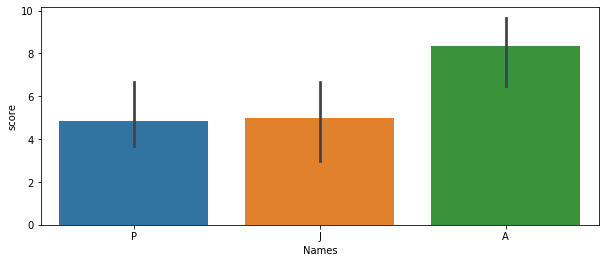

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
print(sns.barplot(x= 'Names' , y='score',data=data))

Alex is the best player because his average mean score is greater than Pat and Jack